In [151]:
import numpy as np
from scipy.linalg import sqrtm
import sys
float_formatter = lambda x : "%.3f" % x
np.set_printoptions(formatter=float_formatter,threshold=sys.maxsize)
from sklearn.datasets._samples_generator import make_circles,make_moons
from sklearn.metrics import pairwise_distances
from sklearn.cluster import SpectralClustering,KMeans
from matplotlib import pyplot as plt
import networkx as nx 
import seaborn as sns
sns.set()


Text(0, 0.5, 'Height')

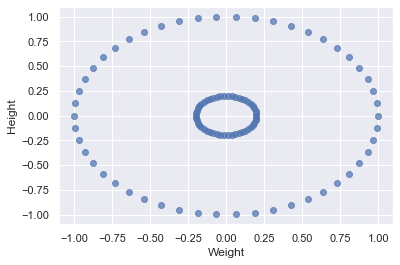

In [152]:
X,y = make_circles(factor=0.2)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')


In [153]:
W = pairwise_distances(X,metric="euclidean")
vectorizer = np.vectorize(lambda x : 1 if x<0.25 else 0)
W = vectorizer(W)


In [154]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_labels(G,pos)
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

In [155]:
#Degree matrix
D = np.diag(np.sum(W,axis=1))


In [156]:
# normalized laplacian matrix
L = D - W
DsqrN = sqrtm(np.linalg.matrix_power(D,-1))
L = np.matmul(np.matmul(DsqrN,L),DsqrN)


In [157]:
#Now we gotta look for eigenvectors and eigenvalues of Laplacian matrix
e,v = np.linalg.eig(L)
print("eigenvalues : ", e.tolist())
print("eigenvectos shape " , v.shape)


eigenvalues :  [0.08246221330409119, 0.12732200375003486, 0.18068758171905935, 6.203661148656729e-17, 3.808317572953475e-16, 0.0052568657903482256, 0.005256865790348465, 0.020944559247579275, 0.020944559247580197, 0.0468156760744992, 0.04681567607449902, 1.3333333333333346, 0.08246221330409086, 0.24171734016754046, 0.309448803347336, 0.38281380562328404, 0.12732200375003586, 0.18068758171905983, 0.4606553370833695, 0.30944880334733466, 0.3828138056232851, 1.3280764675429835, 0.2417173401675406, 0.5417457902761834, 1.3280764675429813, 1.3123887740857545, 0.4606553370833694, 0.5417457902761821, 0.7085270130195439, 0.6248063203137887, 1.2865176572588348, 1.2508711200292442, 1.312388774085754, 0.6248063203137928, 0.26544631230101934, 1.2865176572588328, 1.1526457516142772, 0.7915875430571502, 1.2060113295832997, 0.7085270130195429, 0.8726779962499673, 1.2508711200292433, 1.206011329583302, 0.2654463123010192, 0.7915875430571517, 1.0916159931657974, 0.8169627440759283, 1.152645751614273, 1.

[3, 4]
number of clusters :  2


<function matplotlib.pyplot.show(close=None, block=None)>

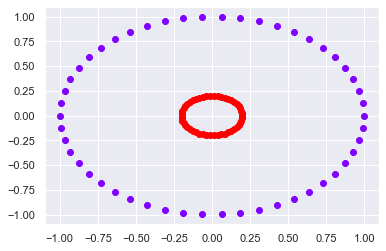

In [158]:
i = np.where(e < 1e-5)[0]
print(i.tolist())
print("number of clusters : ", len(i))
F = np.array([v[:,k] for k in i]).T
kmeans_clstr = KMeans(n_clusters=len(i)).fit(F)
colors = plt.cm.rainbow(np.linspace(0,1,len(i)))
for x in range(len(X)):
    plt.scatter(X[x,0],X[x,1],color=colors[kmeans_clstr.labels_[x]])
plt.show